/tmp/ipykernel_907/2625551190.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


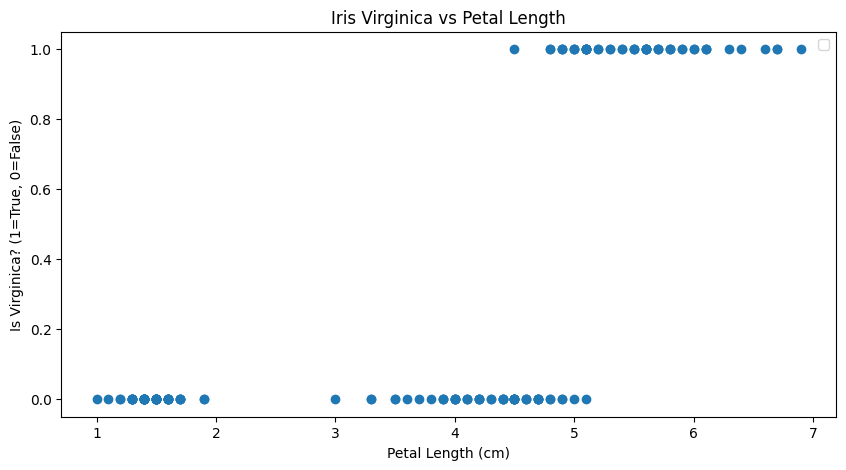

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

virginica = iris['species'] == 'virginica'

plt.figure(figsize=(10,5))
plt.scatter(iris['petal_length'],virginica)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Is Virginica? (1=True, 0=False)')
plt.title('Iris Virginica vs Petal Length')
plt.legend()
plt.show()

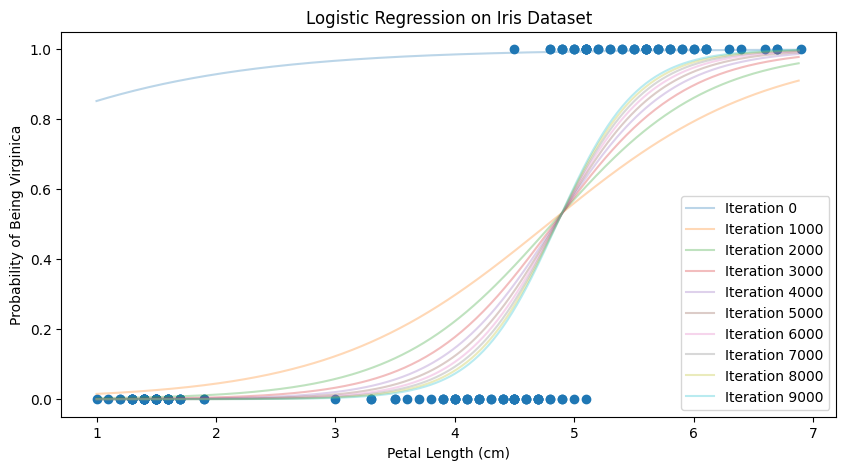

[np.float64(-15.100803521145172), np.float64(3.1098583941541467)]


In [2]:
def sigmoid(z,w):
    return 1/(1+np.exp(-w[0] - (w[1]*z)))

def train_logreg(x,y_true,lr=0.01,iterations=1000):
    T = [1,1]
    
    plt.scatter(iris['petal_length'],virginica)
    x_model = np.arange(iris['petal_length'].min(),iris['petal_length'].max(),0.02)
    y_model = sigmoid(x_model,T)
    # plt.plot(x_model,y_model,color='red',alpha=0.3,label='Initial Model')

    for i in range(iterations):
        p = sigmoid(x,T)
        dJ0 = np.sum(sigmoid(x,T) - y_true) / len(x)
        dJ1 = np.sum((sigmoid(x,T) - y_true) * x) / len(x)
        T[0] = T[0] - lr * dJ0
        T[1] = T[1] - lr * dJ1
        if i % 1000 == 0:
            y_model = sigmoid(x_model,T)
            plt.plot(x_model,y_model,alpha=0.3,label='Iteration {}'.format(i))

    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Probability of Being Virginica')
    plt.title('Logistic Regression on Iris Dataset')
    plt.legend()
    plt.show()

    return T

plt.figure(figsize=(10,5))

X = iris['petal_length'].to_numpy()
T = train_logreg(X,virginica.to_numpy(), lr=0.1, iterations=10000)
print(T)

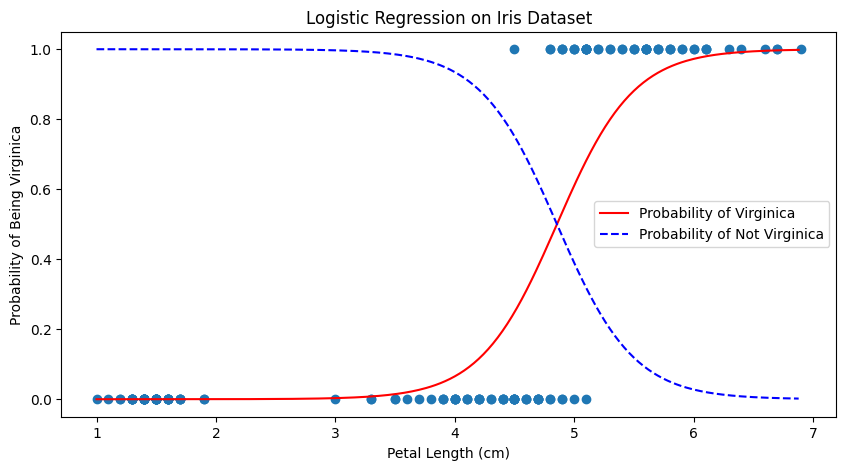

In [26]:
x_model = np.arange(iris['petal_length'].min(),iris['petal_length'].max(),0.02)
y_model = sigmoid(x_model,T)

plt.figure(figsize=(10,5))
plt.scatter(iris['petal_length'],virginica)
plt.plot(x_model,y_model,color='red', label='Probability of Virginica')
plt.plot(x_model,1-y_model,color='blue', label='Probability of Not Virginica', linestyle='--')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability of Being Virginica')
plt.title('Logistic Regression on Iris Dataset')
plt.legend()
plt.show()